In [1]:
import json
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Collect statistics

In [2]:
load_dir = '../results/basic_stats.json'
with open(load_dir, 'r') as input_file:
    read_dict = json.load(input_file)

Plot counts

In [3]:
models_dict = {
    list(read_dict.keys())[0]+str(0):read_dict.values(),
    list(read_dict.keys())[0]+str(1):read_dict.values(),
    list(read_dict.keys())[0]+str(2):read_dict.values(),
}


In [4]:
model_keys = list(models_dict.keys())
model_0_results = list(models_dict[model_keys[0]])[0]
dataset_keys = list(model_0_results.keys())
measures_values = [list(model_0_results[dset].values()) for dset in dataset_keys]
measures_keys = list(model_0_results[dataset_keys[0]].keys())



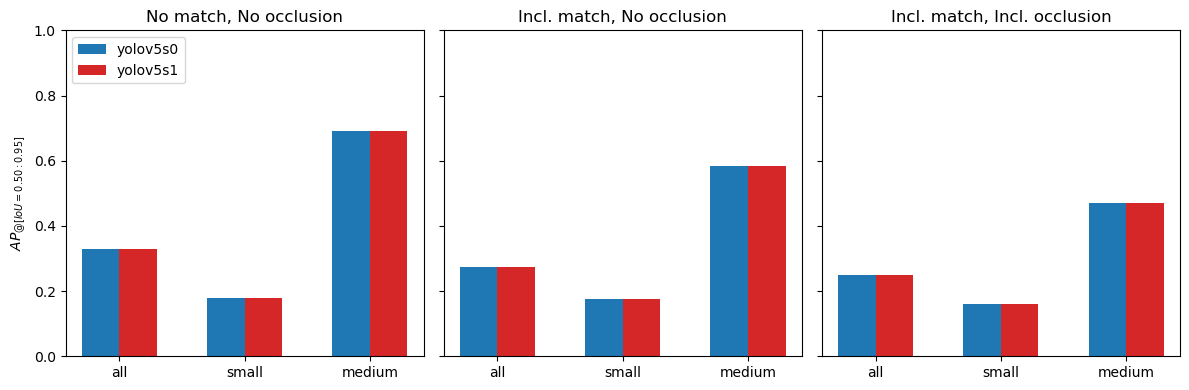

In [15]:
labels = [key[measures_keys[0].rfind('-')+1:-1] for key in measures_keys]

x = np.arange(len(labels))
width = 0.3
gap = 0.00

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
ax=axes.ravel()

ax[0].bar(x-width/2-gap, measures_values[0], color = 'tab:blue', width = width, label = model_keys[0])
ax[0].bar(x+width/2+gap, measures_values[0], color = 'tab:red', width = width, label = model_keys[1])
ax[0].set_title("No match, No occlusion")
ax[0].set_ylabel('$'+ measures_keys[0][:measures_keys[0].find('-')]+'}$')
ax[0].set_ylim([0,1])
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend(loc ="upper left")

ax[1].bar(x-width/2, measures_values[1], color ='tab:blue', width = width, label = model_keys[0])
ax[1].bar(x+width/2, measures_values[1], color = 'tab:red', width = width, label = model_keys[1])
ax[1].set_title("Incl. match, No occlusion")
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)

ax[2].bar(x-width/2, measures_values[2], color = 'tab:blue', width = width, label = model_keys[0])
ax[2].bar(x+width/2, measures_values[2], color = 'tab:red', width = width, label = model_keys[1])
ax[2].set_title("Incl. match, Incl. occlusion")
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)

fig.tight_layout()
plt.show()